<a href="https://colab.research.google.com/github/Himanshu584/insurance-price-prediction/blob/main/insurance_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective :-** We will try to predict personal health insurance costs bases on  various parameters.

To read or to get more information about the dataset, visit [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) which is publically available on kaggle.


---



# Data

Lets load and see our data to get some intution and understanding of the same.


In [1]:
import pandas as pd  # Used for loading data into DataFrame and data-manipulation

In [2]:
# Load data into a DataFrame 
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_data.head() # Prints first 5 rows of our dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Clearly, This is a Regression Problem 


We have 4 columns consisting of numerical values and 3 columns consisting of catagorical values .

For this problem we will build a neural network model that can predict charges based on various parameters

Let's begin by checking data-types of various columns in our dataset

In [3]:
insurance_data['age'].dtype

dtype('int64')

In [4]:
insurance_data['sex'].dtype

dtype('O')

In [5]:
insurance_data['bmi'].dtype

dtype('float64')

In [6]:
insurance_data['children'].dtype

dtype('int64')

In [7]:
insurance_data['smoker'].dtype

dtype('O')

In [8]:
insurance_data['region'].dtype

dtype('O')

We can see that we have:
* 3 columns of dtype `object` - smoker, region & sex 
* 2 columns of dtype `int64`  - children, age
* 1 column of dtype `float64` - bmi

we will first focus on converting the catagorical variables into numerical variables. For this we can use `get_dummies` method in pandas which is a way of one-hot incoding in pandas, But we will perform `normalization` on data because we want to bring our numerical variables into same scale and also we want to one-hot encode our catagorical variables.

As we are going to build deep-learning regression model, deep-learning models tend to prefer `MiniMax Scaler` to scale the values.


In [27]:
# import minimax scaler , column_transformer and onehot-encoder from sklearn

from sklearn.compose import make_column_transformer # helps to transform both catagorical & numerical columns at once
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder # MinMaxScaler: for numerical normalization , OneHotEncoder: to convert catagorical to numerical

ct = make_column_transformer(
    (MinMaxScaler(),['age', 'bmi', 'children']), # tranforms all values between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'),['sex', 'smoker', 'region']) 
)

lets now assign features and labels to our dataset

In [28]:
X = insurance_data.drop("charges", axis=1) # inputs\features (independent variables)
y = insurance_data["charges"] # labels\output (dependent variable)

In [29]:
X.head(3)

,age,sex,bmi,children,smoker,region
0,19,female,27.90,0,yes,southwest
1,18,male,33.77,1,no,southeast
2,28,male,33.00,3,no,southeast


In [30]:
X.shape, y.shape

((1338, 6), (1338,))

Now, lets split our data into training and testing datasets

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

Now , lets normalize our train and test data

In [32]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [33]:
# fit column transformer to training data 
ct.fit(X_train)

# transform train and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [34]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [35]:
X_test_normal

array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

we can clearly see all our data is now transformed !!!. great achievement in preprocessing . its always a happy feeling when preprocessing is complete

Now that our data is normalized , lets build a neural network model and fit it on the training data. 

`My favourite part of the work`


In [37]:
import tensorflow as tf # library that helps building deep learning models 
tf.__version__

'2.4.1'

lets first build `model_1` with one Dense layer with 1 hidden neuron

In [41]:
# set the random state for reproducibility 
tf.random.set_seed(42)

# Build model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model with normalized training data for 100 epochs
history_1 = model_1.fit(X_train_normal,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 993us/step - loss: 13298.5308 - mae: 13298.5308
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12957.0451 - mae: 12957.0451
Epoch 3/100
34/34 [==============================] - 0s 954us/step - loss: 12730.4789 - mae: 12730.4789
Epoch 4/100
34/34 [==============================] - 0s 986us/step - loss: 13431.9013 - mae: 13431.9013
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13360.8761 - mae: 13360.8761
Epoch 6/100
34/34 [==============================] - 0s 991us/step - loss: 13236.3426 - mae: 13236.3426
Epoch 7/100
34/34 [==============================] - 0s 931us/step - loss: 13281.2065 - mae: 13281.2065
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13637.7903 - mae: 13637.7903
Epoch 9/100
34/34 [==============================] - 0s 984us/step - loss: 13438.6315 - mae: 13438.6315
Epoch 10/100
34/34 [==============================] - 0s 995us/step - 

In [42]:
# Evaluate the model on test data 
model_1.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 12871.9619 - mae: 12871.9619


[12871.9619140625, 12871.9619140625]

As we see, our model performs horible at this point of time 😂,
its time to experiment a little and improve our models performance



Lets build `model_2` with 3 dense layers and change our optimizer to `Adam`

In [43]:
# set random seed
tf.random.set_seed(42)

# build model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # 100 neurons in each hidden layer
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit model_2 and train for 100 epochs
history_2 = model_2.fit(X_train_normal,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13296.0512 - mae: 13296.0512
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12930.6596 - mae: 12930.6596
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12608.3409 - mae: 12608.3409
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13053.5572 - mae: 13053.5572
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12463.6689 - mae: 12463.6689
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 11466.4434 - mae: 11466.4434
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 10421.1109 - mae: 10421.1109
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 9628.0480 - mae: 9628.0480
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 8665.5269 - mae: 8665.5269
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8380.5256 - 

In [44]:
# Evaluate model_2
model_2.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3162.8762 - mae: 3162.8762


[3162.876220703125, 3162.876220703125]

Looks like our `model_2` has performed wat better than `model_1`
 
model_1 gave us a mean absolute error of appx. 12872 whereas model_2 gave us an mean absolute error of appx. 3163. surely our model_2 outperforms model_1

But lets see our loss function decreasing visually

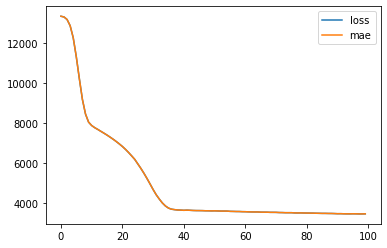

In [47]:
pd.DataFrame(history_2.history).plot()


looks like our `loss` is only decreasing slightly after around 50 epochs,the loss curve is starting to flatten around this value, 
we can use early_stopping callback for this and to prevent overfitting the data
lets see that in application in model_3

In [48]:
# set random seed
tf.random.set_seed(42)

# model_3
model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1)
])

# compile model_3
model_3.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

# fit and train for 100 epochs
history_3 = model_3.fit(X_train_normal, y_train, epochs=100, callbacks=[early_stopping])

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13296.0512 - mae: 13296.0512
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12930.6596 - mae: 12930.6596
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12608.3409 - mae: 12608.3409
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13053.5572 - mae: 13053.5572
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 12463.6689 - mae: 12463.6689
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 11466.4434 - mae: 11466.4434
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 10421.1109 - mae: 10421.1109
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 9628.0480 - mae: 9628.0480
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 8665.5269 - mae: 8665.5269
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8380.5256 - 

In [49]:
# evaluate model_3
model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3162.8762 - mae: 3162.8762


[3162.876220703125, 3162.876220703125]

seems like our `model_2` results and `model_3` results are same, 

lets compare the loss curves for both models

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde1dc98e10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fde1c9cadd0>)

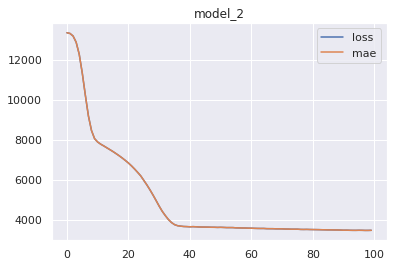

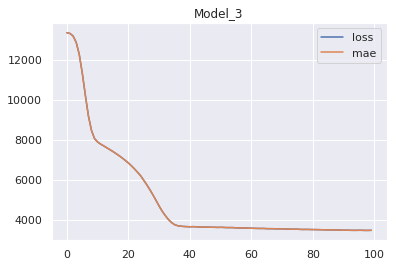

In [52]:
pd.DataFrame(history_2.history).plot(title="model_2"), pd.DataFrame(history_3.history).plot(title="Model_3")

So, the plots are exactly same and our intution about flattening curve in model_2 was wrong . But its good to have an early stopping callback to prevent the model from overfitting. 
so, to conclude .. both model_2 and model_3 are same and produce the same results . lets now build one last model to see if our performance increases or not. this time lets train for 200 epochs

In [53]:
# random-seed
tf.random.set_seed(42)

# build model_4
model_4 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1),
])

# compile model_4
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="mae", patience=3)

# fit the model for 200 epochs
history_4 = model_4.fit(X_train_normal, y_train, epochs=200, callbacks = [early_stopping])

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13296.0512 - mae: 13296.0512
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12930.6596 - mae: 12930.6596
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12608.3409 - mae: 12608.3409
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13053.5572 - mae: 13053.5572
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 12463.6689 - mae: 12463.6689
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 11466.4434 - mae: 11466.4434
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 10421.1109 - mae: 10421.1109
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 9628.0480 - mae: 9628.0480
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 8665.5269 - mae: 8665.5269
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 8380.5256 - 

In [54]:
# evaluate model_4

model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3165.6287 - mae: 3165.6287


[3165.628662109375, 3165.628662109375]

Clearly , using early stopping proved to be a blessing in this case.. model stopped training after 101 epochs which is just one more iteration than `model_3`.

thus our `model_4` is the best model so far 
we can try more by adjusting learning rate or increasing number of layers and hidden units .. but for now we have a great performing model ready to be used for predicting Insurance Charges for a person based on parameters discussed above.

**Thankyu!**